# Train/Val split

In [1]:
# import os

# os.listdir('../data'), len(os.listdir('../data/notmalware')), len(os.listdir('../data/malware'))

(['notmalware', 'malware'], 70000, 30000)

In [33]:
# from glob import glob

# malware_filepaths = glob("../data/malware/*.png")
# notmalware_filepaths = glob("../data/notmalware/*.png")

# len(malware_filepaths), len(notmalware_filepaths)

(30000, 70000)

In [34]:
# import random

# # shuffle filepaths
# random.seed(420)
# random.shuffle(malware_filepaths)
# random.shuffle(notmalware_filepaths)

# def partition(lst, n): 
#     division = len(lst) / float(n) 
#     return [ lst[int(round(division * i)): int(round(division * (i + 1)))] for i in range(n) ]

# # partition into 10 equal splits
# malware_filepath_splits = partition(malware_filepaths, 10)
# notmalware_filepath_splits = partition(notmalware_filepaths, 10)

In [50]:
# # split into train:val with 80:20 split, doing it this way to ensure equal distribution of mal/notmal

# train_splits = malware_filepath_splits[:8] + notmalware_filepath_splits[:8]
# train = [filepath for split in train_splits for filepath in split] # basically flattern the list of lists

# val_splits = malware_filepath_splits[8:] + notmalware_filepath_splits[8:]
# val = [filepath for split in val_splits for filepath in split] # basically flattern the list of lists

# random.shuffle(train)
# random.shuffle(val)

# len(train), len(val)

(80000, 20000)

In [58]:
# import shutil

# for src in train:
#     dst = "../data/train/" + '/'.join(src.split('/')[-2:])
#     shutil.copyfile(src, dst)

In [59]:
# import shutil

# for src in val:
#     dst = "../data/val/" + '/'.join(src.split('/')[-2:])
#     shutil.copyfile(src, dst)

In [62]:
(len(os.listdir('../data/train/malware')), len(os.listdir('../data/train/notmalware')), 
 len(os.listdir('../data/val/malware')), len(os.listdir('../data/val/notmalware')))

(24000, 56000, 6000, 14000)

# Define models

In [66]:
import torch 

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


Filtered through pre-trained models available on Pytorch and settled on testing the following based on their model params (<25M) and Acc@1 (>75%):
 - efficientnet_v2_s w EfficientNet_V2_S_Weights.IMAGENET1K_V1
 - regnet_y_3_2gf w RegNet_Y_3_2GF_Weights.IMAGENET1K_V2
 - densenet201 w DenseNet201_Weights.IMAGENET1K_V1
 - mnasnet1_3 w MNASNet1_3_Weights.IMAGENET1K_V1
 - shufflenet_v2_x2_0 w ShuffleNet_V2_X2_0_Weights.IMAGENET1K_V1
 - mobilenet_v3_large w MobileNet_V3_Large_Weights.IMAGENET1K_V2


In [67]:
from torchvision.models import (efficientnet_v2_s, 
                                regnet_y_3_2gf, 
                                densenet201, 
                                mnasnet1_3, 
                                shufflenet_v2_x2_0, 
                                mobilenet_v3_large)

In [74]:
net = efficientnet_v2_s(weights="IMAGENET1K_V1").to(device)

In [75]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [76]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    ])

trainset = torchvision.datasets.ImageFolder('../data/train', transform=transform)

batch_size = 4

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


In [77]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 0:    # print every 100 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.004
[1,   101] loss: 0.120
[1,   201] loss: 0.030
[1,   301] loss: 0.026
[1,   401] loss: 0.022
[1,   501] loss: 0.024
[1,   601] loss: 0.022
[1,   701] loss: 0.022
[1,   801] loss: 0.019
[1,   901] loss: 0.019
[1,  1001] loss: 0.019
[1,  1101] loss: 0.019
[1,  1201] loss: 0.020
[1,  1301] loss: 0.016
[1,  1401] loss: 0.014
[1,  1501] loss: 0.017
[1,  1601] loss: 0.017
[1,  1701] loss: 0.016
[1,  1801] loss: 0.013
[1,  1901] loss: 0.018
[1,  2001] loss: 0.019
[1,  2101] loss: 0.017
[1,  2201] loss: 0.018
[1,  2301] loss: 0.015
[1,  2401] loss: 0.015
[1,  2501] loss: 0.019
[1,  2601] loss: 0.019
[1,  2701] loss: 0.014
[1,  2801] loss: 0.016
[1,  2901] loss: 0.012
[1,  3001] loss: 0.016
[1,  3101] loss: 0.014
[1,  3201] loss: 0.014
[1,  3301] loss: 0.016
[1,  3401] loss: 0.015
[1,  3501] loss: 0.013
[1,  3601] loss: 0.013
[1,  3701] loss: 0.015
[1,  3801] loss: 0.013
[1,  3901] loss: 0.013
[1,  4001] loss: 0.014
[1,  4101] loss: 0.012
[1,  4201] loss: 0.015
[1,  4301] 

KeyboardInterrupt: 

In [78]:
torch.save(net, "efficientnet_v2_s.pkl")

In [79]:
net = torch.load('efficientnet_v2_s.pkl')

In [81]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    ])

valset = torchvision.datasets.ImageFolder('../data/val', transform=transform)

batch_size = 4

testloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


In [84]:
dataiter = iter(testloader)
images, labels = dataiter.next()

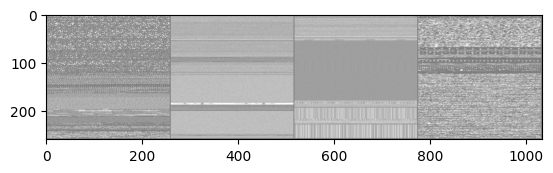

GroundTruth:  notmalware malware malware notmalware


In [87]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

classes = ["malware", "notmalware"]
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [89]:
outputs = net(images.to(device))

In [91]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  notmalware malware malware notmalware


In [93]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        if total > 1000:
            break
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on first 1000 test images: {100 * correct // total} %')

Accuracy of the network on first 1000 test images: 92 %


In [95]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
total = 0
with torch.no_grad():
    for data in testloader:
        if total > 1000:
            break
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)        
        
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        total += labels.size(0)
        
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: malware is 81.1 %
Accuracy for class: notmalware is 98.1 %
